In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\rasag\Downloads\sales_data.csv")
print(df.head())

          product    price  quantity   revenue   profit  ratings
0         Monitor  1326.41         3   3979.23  1554.00      4.6
1          Webcam  1494.72         4   5978.88  2250.60      4.9
2         Monitor   192.28         1    192.28    29.72      5.0
3  Wireless Mouse  1159.16         9  10432.44  3784.50      4.9
4      Smartwatch   977.39         7   6841.73  1732.08      4.2


In [4]:
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales",conn, if_exists = "replace", index = False)

50

In [5]:
print(pd.read_sql_query("Select * from sales Limit 5", conn ))

          product    price  quantity   revenue   profit  ratings
0         Monitor  1326.41         3   3979.23  1554.00      4.6
1          Webcam  1494.72         4   5978.88  2250.60      4.9
2         Monitor   192.28         1    192.28    29.72      5.0
3  Wireless Mouse  1159.16         9  10432.44  3784.50      4.9
4      Smartwatch   977.39         7   6841.73  1732.08      4.2


In [8]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(revenue) AS total_revenue,
    SUM(profit) AS total_profit
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
"""

summary_df = pd.read_sql_query(query, conn)
print(summary_df)

             product  total_quantity  total_revenue  total_profit
0             Webcam              40       41521.25      10579.44
1             Laptop              31       33772.11       5415.87
2           Keyboard              45       32299.03       7847.31
3     Wireless Mouse              39       30762.77       7731.30
4             Tablet              34       29684.23       7498.40
5            Monitor              26       22854.03       5745.90
6         Smartphone              29       18738.13       4080.75
7       External HDD              19       17864.11       3303.19
8         Smartwatch              22       11776.68       2688.94
9  Bluetooth Speaker               7        1249.08        413.70


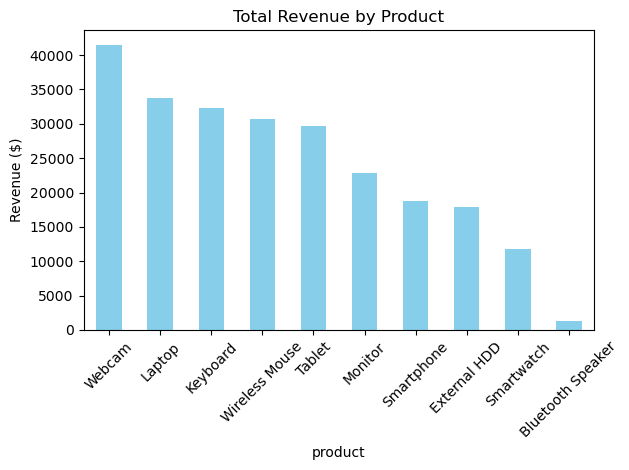

In [9]:
summary_df.plot(kind="bar", x="product", y="total_revenue", legend=False, color="skyblue")
plt.title("Total Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenue_chart.png")
plt.show()